In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [7]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [8]:
data.shape

(7920, 3)

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [11]:
import re
import string

In [12]:
### convert uppercase to lowercase

In [13]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
### Remove Links

In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x,  flags=re.MULTILINE) for x in x.split()))

In [17]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [18]:
###Remove Punchuation

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [21]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [22]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [23]:
###Remove Numbers

In [24]:
data["tweet"] = data['tweet'].str.replace('/d+', '', regex=True)

In [25]:
###Remove StopWords

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('stopwords', download_dir='../static./model')

[nltk_data] Downloading package stopwords to ../static./model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [33]:
###Stemming

In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [36]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [37]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love 90 year old neighbor ipad morn made ...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [38]:
###ML model can't understand letters so we wonna translate this text to nummerical value

In [39]:
###1st Build Vocabulary

In [40]:
from collections import Counter
vocab = Counter()

In [41]:
vocab

Counter()

In [42]:
for sentence in data['tweet']:
   vocab.update(sentence.split())

In [43]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 413,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 3725,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 346,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 59,
         'sonyexperias…': 1,
         'love': 490,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [44]:
len(vocab)

16962

In [45]:
data.shape

(7920, 3)

In [46]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 413,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 3725,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 346,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 59,
         'sonyexperias…': 1,
         'love': 490,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [47]:
tokens = [key for key in vocab if vocab[key] > 10] ###count eka 10ta wata wedi ewa vitharak select kara gamu

In [48]:
len(tokens)

1192

In [49]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [50]:
###Divide Dataset

In [51]:
X = data['tweet']
y = data['label']

In [52]:
!pip install scikit-learn

In [53]:
###data set eka train and test walta beda gatta train 80%,Test 80%

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train

5362    love shoe nike neon blue popular run4fun iphon...
1852    fresh new crimbo cloth christma sick new tiedy...
400     dont get iphon popular theyr pure shite androi...
7786    pie make everybodi make everybodi poet word li...
7763    heaven look like salad amaz diet lunch iphon i...
                              ...                        
2686    go get readi nip hospit thenoff appl see home ...
4657          great got wait whole hour talk someon iphon
6652    okay fuckyou appl appl tv remot fuck small nev...
4191    new headphon soni mdrzx600 awesom music old on...
6117    ipad screen glitchey got put guid access wont ...
Name: tweet, Length: 6336, dtype: object

In [56]:
X_test

378     roast pork defin appl sauc steam veggi mash me...
5045    anoth wonder day ilovemyself hot beauti instgr...
7666    woahhh new phone tomorrow galaxi samsung siii ...
3119    macworld love ipad except fact wont play video...
5482    transitoo iphonesia iphon instagood instagram ...
                              ...                        
4967    gain follow rt must follow follow back follow ...
2596    way trafford centr get new phone find need app...
1516    nail nail howto tutori pretti fashion nailart ...
924     blackeysbeat mine didnt even decenc split conc...
6437    would like wish amaz day make everi minut coun...
Name: tweet, Length: 1584, dtype: object

In [57]:
y_train

5362    0
1852    0
400     1
7786    0
7763    0
       ..
2686    0
4657    1
6652    1
4191    0
6117    1
Name: label, Length: 6336, dtype: int64

In [58]:
###Vectorization (text convert to numbers)

In [69]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [92]:
vectorized_x_train = vectorizer(X_train, tokens)

In [86]:
vectorized_x_test = vectorizer(X_test, tokens)

In [93]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_train

5362    0
1852    0
400     1
7786    0
7763    0
       ..
2686    0
4657    1
6652    1
4191    0
6117    1
Name: label, Length: 6336, dtype: int64

In [89]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_test

378     0
5045    0
7666    0
3119    1
5482    0
       ..
4967    0
2596    0
1516    0
924     1
6437    0
Name: label, Length: 1584, dtype: int64

In [73]:
y_train.value_counts() ###balance nethi data set ekkada belima

0    4752
1    1584
Name: label, dtype: int64

In [ ]:
###me data set eka balance nethi nisa balance karamu meka positive comment petthata bara wedi 4724 k tiyana nisa

([<matplotlib.patches.Wedge at 0x2621aed53a0>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Positive'),
  Text(0.7778174593052022, -0.7778174593052025, 'Negative')])

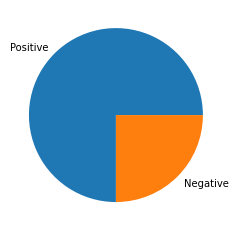

In [76]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])

In [ ]:
###Handle imbalance Dataset (using SMOTE technique)

In [77]:
!pip install imbalanced-learn

In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, Y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, Y_train_smote.shape)

(9504, 1192) (9504,)


In [97]:
Y_train_smote.value_counts()

0    4752
1    4752
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x2621be538b0>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')])

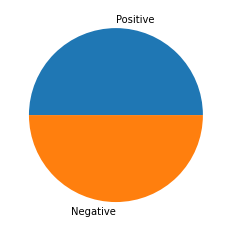

In [98]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])

In [99]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [101]:
Y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9499    1
9500    1
9501    1
9502    1
9503    1
Name: label, Length: 9504, dtype: int64

In [102]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [103]:
y_test

378     0
5045    0
7666    0
3119    1
5482    0
       ..
4967    0
2596    0
1516    0
924     1
6437    0
Name: label, Length: 1584, dtype: int64

In [104]:
###Model Trainig and Evaluation

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [107]:
###fuction ekk hada gamu hada ganna model evaluate karanna eke perfomanxe eka thiranaya karanna

In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3) ###method calling
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [111]:
###Logistic Regration

In [114]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.916
	Recall = 0.974
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.869
	Precision = 0.731
	Recall = 0.842
	F1-Score = 0.782


In [115]:
###Naive Bayes

In [116]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.871
	Recall = 0.953
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.864
	Precision = 0.697
	Recall = 0.907
	F1-Score = 0.789


In [117]:
###Decision  Tree

In [118]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.821
	Precision = 0.688
	Recall = 0.654
	F1-Score = 0.671


In [119]:
###Random Forest Classifier

In [122]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.854
	Precision = 0.76
	Recall = 0.695
	F1-Score = 0.726


In [123]:
###SVC

In [125]:
svm = SVC()
svm.fit(vectorized_x_train_smote, Y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(Y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.96
	Recall = 0.997
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.878
	Precision = 0.772
	Recall = 0.799
	F1-Score = 0.785


In [126]:
import pickle

with open('../static/model.pickle', 'wb') as file:
    pickle.dump(lr, file)